In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import pandas as pd
import statsmodels.api as sm
from sklearn.utils import resample
import math
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from IPython.display import Image
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(1)

## Problem 1

In [2]:
mean = 0
std = 1
X = np.random.normal(mean, std, 100)
y = 0.5 + 0.5 * X - np.power(X,2) + np.power(X,3) + np.random.normal(mean, std, 100)
X_test = np.random.normal(mean, std, 100)
y_test = 0.5 + 0.5 * X_test - np.power(X_test,2) + np.power(X_test,3) + np.random.normal(mean, std, 100)

## Part 1

In [3]:
def fit(X_train, y_train, X_val, y_val, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X_train.reshape(-1, 1))
    model = LinearRegression()
    model.fit(poly_features, y_train) 
    y_val_pred = model.predict(poly.fit_transform(X_val.reshape(-1, 1)))
    return poly, model,mean_squared_error(y_val, y_val_pred)

def predict(poly, model, X_test, y_test):
    y_test_pred = model.predict(poly.fit_transform(X_test.reshape(-1, 1)))
    return mean_squared_error(y_test, y_test_pred)

def k_fold_cross_validation(X, y, X_test, y_test, k, degree, seed = 1):
    np.random.seed(seed)
    n = X.shape[0]
    index = np.random.permutation(n)
    X = X[index]
    y = y[index]
    X_train = np.array_split(X, k)
    y_train = np.array_split(y, k)
    fold_size = n // k
    test_error = []
    validation_error = []
    for i in range(k):
        X_val = X_train[i]
        y_val = y_train[i]
        if i == 0:
            X_train_set = np.array(X_train[i+1:])
            X_train_set = X_train_set.flatten()
            y_train_set = np.array(y_train[i+1:])
            y_train_set = y_train_set.flatten()
        elif i == k-1 :
            X_train_set = np.array(X_train[:i])
            X_train_set = X_train_set.flatten()
            y_train_set = np.array(y_train[:i])
            y_train_set = y_train_set.flatten()
        else :
            X_train_set = np.concatenate((X_train[:i], X_train[i+1:]), axis = 0)
            X_train_set = X_train_set.flatten()
            y_train_set = np.concatenate((y_train[:i], y_train[i+1:]), axis = 0)
            y_train_set = y_train_set.flatten()

        poly, model, mse_val = fit(X_train_set, y_train_set, X_val, y_val, degree)
        mse_test = predict(poly, model, X_test,y_test)
        validation_error.append(mse_val)
        test_error.append(mse_test)

    return degree, np.mean(validation_error), np.mean(test_error)


def holdout(X, y, X_test, y_test, degree, split=0.25, seed = 1):
    np.random.seed(seed)
    fold_size = int(split*100)
    indices = np.random.permutation(fold_size)
    X_val = X[indices]
    y_val = y[indices]
    X_train = np.delete(X, indices)
    y_train = np.delete(y, indices)
    poly, model, mse_val = fit(X_train, y_train, X_val, y_val, degree)
    mse_test = predict(poly, model, X_test,y_test)
    
    return degree, np.mean(mse_val), np.mean(mse_test)


def loocv(X, y, X_test, y_test, degree, seed = 1):
    np.random.seed(seed)
    n = len(X)
    validation_error = []
    test_error = []
    for i in range(n):
        X_val = X[i].reshape(-1,1)
        X_val = X_val.flatten()
        y_val = y[i].reshape(-1,1)
        y_val = y_val.flatten()
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i)
        poly, model, mse_val = fit(X_train, y_train, X_val, y_val, degree)
        mse_test = predict(poly, model, X_test,y_test)
        validation_error.append(mse_val)
        test_error.append(mse_test)
        
    return degree, np.mean(validation_error), np.mean(test_error)

In [4]:
holdout(X, y, X_test, y_test, 2)

(2, 7.454227525575329, 6.878114381002144)

## Holdout

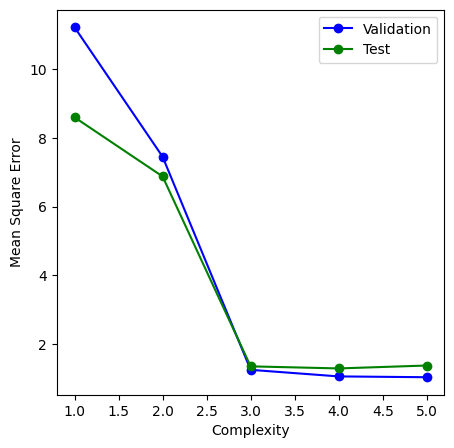

In [5]:
x = []
mse_val = []
mse_test = []
for degree in range(1, 6):
    results = holdout(X, y, X_test, y_test, degree=degree)
    x.append(degree)
    mse_val.append(results[1])
    mse_test.append(results[2])
    
plt.figure(figsize=(5,5))
plt.plot(x, mse_val, marker='o', label='Validation', color = 'blue')
plt.plot(x, mse_test, marker='o', label='Test',color = 'green')
plt.legend(loc="upper right")
plt.xlabel('Complexity')
plt.ylabel('Mean Square Error')
plt.show()

## K Fold

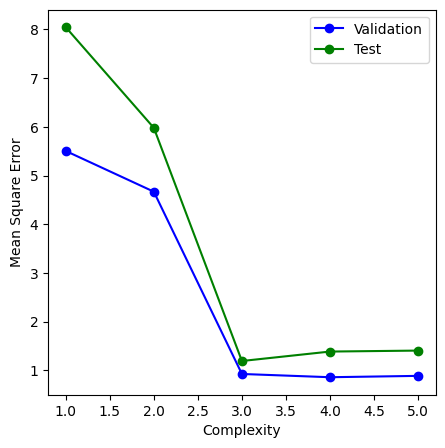

In [6]:
x = []
mse_val = []
mse_test = []
for degree in range(1, 6):
    results = k_fold_cross_validation(X, y, X_test, y_test, k=10, degree=degree, seed = 1)
    x.append(degree)
    mse_val.append(results[1])
    mse_test.append(results[2])
    
plt.figure(figsize=(5, 5))
plt.plot(x, mse_val, marker='o', label='Validation', color = 'blue')
plt.plot(x, mse_test, marker='o', label='Test', color='green')
plt.legend(loc="upper right")
plt.xlabel('Complexity')
plt.ylabel('Mean Square Error')
plt.show()

## LOOCV

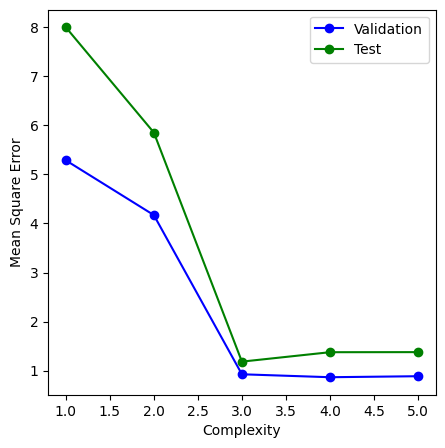

In [7]:
x = []
mse_val = []
mse_test = []
for degree in range(1, 6):
    results = loocv(X, y, X_test, y_test, degree=degree)
    x.append(degree)
    mse_val.append(results[1])
    mse_test.append(results[2])
    
plt.figure(figsize=(5, 5))
plt.plot(x, mse_val, marker='o', label='Validation', color = 'blue')
plt.plot(x, mse_test, marker='o', label='Test',color = 'green')
plt.legend(loc="upper right")
plt.xlabel('Complexity')
plt.ylabel('Mean Square Error')
plt.show()

In [8]:
for degree in range(1, 6):
    print('\nDegree:', degree)
    print('\nLOOCV')
    print(loocv(X, y, X_test, y_test, degree=degree))
    print('\nK Fold Cross Validation')
    print(k_fold_cross_validation(X, y, X_test, y_test, k=10, degree=degree))


Degree: 1

LOOCV
(1, 5.285695440895271, 7.996637215595804)

K Fold Cross Validation
(1, 5.505488651186946, 8.046642324327227)

Degree: 2

LOOCV
(2, 4.16996357963943, 5.851489220757629)

K Fold Cross Validation
(2, 4.669047674656843, 5.980455178178952)

Degree: 3

LOOCV
(3, 0.926876878164881, 1.1846506015860212)

K Fold Cross Validation
(3, 0.9263861292441469, 1.1926994679318805)

Degree: 4

LOOCV
(4, 0.8669116865881084, 1.376541556741661)

K Fold Cross Validation
(4, 0.8596031986791614, 1.3866226211468076)

Degree: 5

LOOCV
(5, 0.8874839660196069, 1.378092940298431)

K Fold Cross Validation
(5, 0.8874085769183176, 1.4065470038565278)


## Part 2

Using all the three technique, the optimal model complexity is 3. As the complexity increases, the validation error decreases slighlty, however the test error increases as the model starts to overfit with increase in complexity. Each method has its advantages depending on the data. However, in our case the holdout validation looks the most promising method as it finds the right balance between computation required and on minimizing the mean squared error.

## Part 3

## Seed  = 5

## Holdout

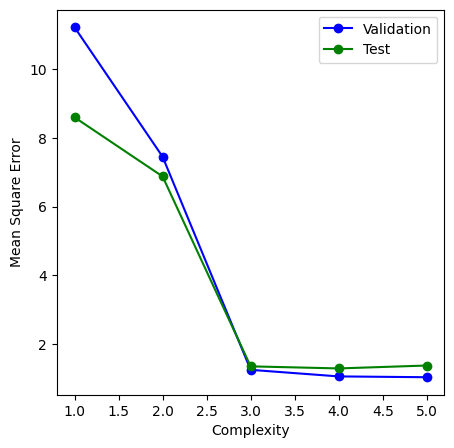

In [9]:
x = []
mse_val = []
mse_test = []
for degree in range(1, 6):
    results = holdout(X, y, X_test, y_test, degree=degree, seed = 5)
    x.append(degree)
    mse_val.append(results[1])
    mse_test.append(results[2])
    
plt.figure(figsize=(5,5))
plt.plot(x, mse_val, marker='o', label='Validation', color = 'blue')
plt.plot(x, mse_test, marker='o', label='Test',color = 'green')
plt.legend(loc="upper right")
plt.xlabel('Complexity')
plt.ylabel('Mean Square Error')
plt.show()

## K Fold

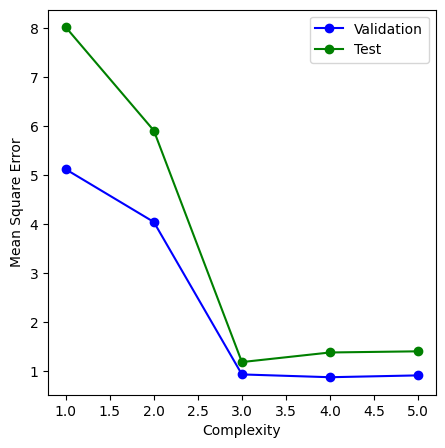

In [10]:
x = []
mse_val = []
mse_test = []
for degree in range(1, 6):
    results = k_fold_cross_validation(X, y, X_test, y_test, k=10, degree=degree, seed = 5)
    x.append(degree)
    mse_val.append(results[1])
    mse_test.append(results[2])
    
plt.figure(figsize=(5, 5))
plt.plot(x, mse_val, marker='o', label='Validation', color = 'blue')
plt.plot(x, mse_test, marker='o', label='Test', color='green')
plt.legend(loc="upper right")
plt.xlabel('Complexity')
plt.ylabel('Mean Square Error')
plt.show()

## LOOCV

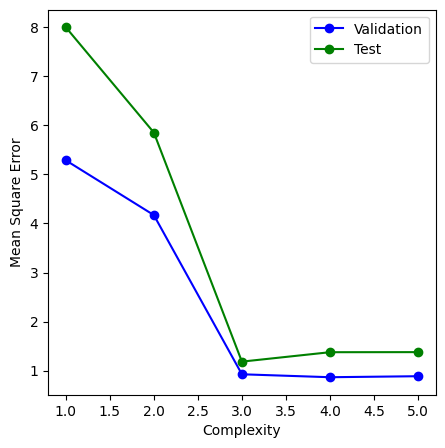

In [11]:
x = []
mse_val = []
mse_test = []
for degree in range(1, 6):
    results = loocv(X, y, X_test, y_test, degree=degree, seed = 10)
    x.append(degree)
    mse_val.append(results[1])
    mse_test.append(results[2])
    
plt.figure(figsize=(5, 5))
plt.plot(x, mse_val, marker='o', label='Validation', color = 'blue')
plt.plot(x, mse_test, marker='o', label='Test',color = 'green')
plt.legend(loc="upper right")
plt.xlabel('Complexity')
plt.ylabel('Mean Square Error')
plt.show()

## Seed  = 10

## Holdout

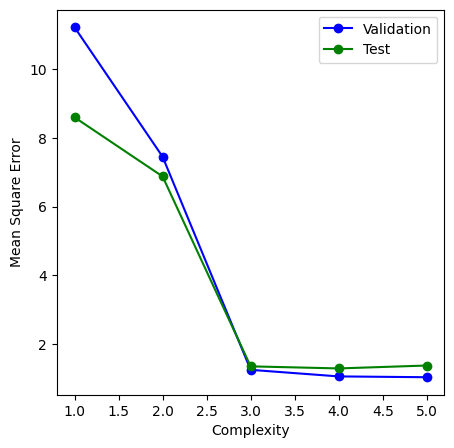

In [12]:
x = []
mse_val = []
mse_test = []
for degree in range(1, 6):
    results = holdout(X, y, X_test, y_test, degree=degree, seed = 10)
    x.append(degree)
    mse_val.append(results[1])
    mse_test.append(results[2])
    
plt.figure(figsize=(5,5))
plt.plot(x, mse_val, marker='o', label='Validation', color = 'blue')
plt.plot(x, mse_test, marker='o', label='Test',color = 'green')
plt.legend(loc="upper right")
plt.xlabel('Complexity')
plt.ylabel('Mean Square Error')
plt.show()

## K Fold

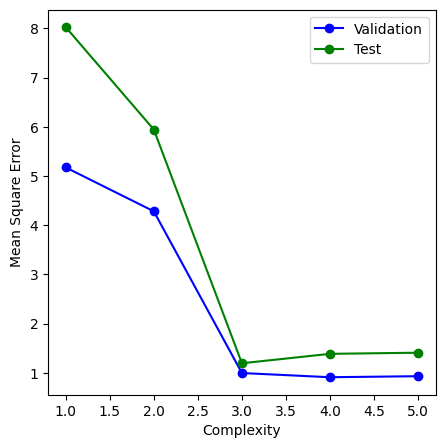

In [13]:
x = []
mse_val = []
mse_test = []
for degree in range(1, 6):
    results = k_fold_cross_validation(X, y, X_test, y_test, k=10, degree=degree, seed = 10)
    x.append(degree)
    mse_val.append(results[1])
    mse_test.append(results[2])
    
plt.figure(figsize=(5, 5))
plt.plot(x, mse_val, marker='o', label='Validation', color = 'blue')
plt.plot(x, mse_test, marker='o', label='Test', color='green')
plt.legend(loc="upper right")
plt.xlabel('Complexity')
plt.ylabel('Mean Square Error')
plt.show()

## LOOCV

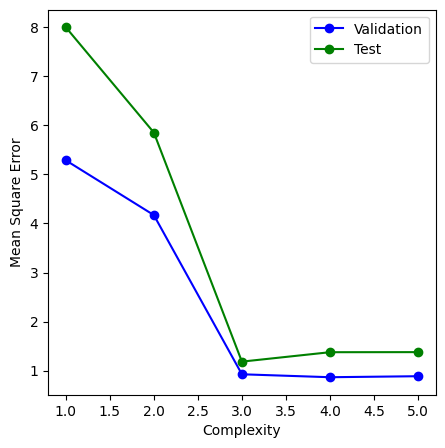

In [14]:
x = []
mse_val = []
mse_test = []
for degree in range(1, 6):
    results = loocv(X, y, X_test, y_test, degree=degree, seed = 10)
    x.append(degree)
    mse_val.append(results[1])
    mse_test.append(results[2])
    
plt.figure(figsize=(5, 5))
plt.plot(x, mse_val, marker='o', label='Validation', color = 'blue')
plt.plot(x, mse_test, marker='o', label='Test',color = 'green')
plt.legend(loc="upper right")
plt.xlabel('Complexity')
plt.ylabel('Mean Square Error')
plt.show()

In general, changing the seed doesn't cause much difference as the optimal complexity remains the same for all three techniques.

## Problem 2

In [15]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def bootstrap(n_bootstraps, x, y):
    betas = np.zeros((n_bootstraps, 3))
    for i in range(n_bootstraps):
        index = np.random.choice(100, 100, replace=True)
        x_resampled, y_resampled = x[index], y[index]
        coefs_sample = np.polyfit(x_resampled, y_resampled, deg=3)
        betas[i,:] = [coefs_sample[2], coefs_sample[1], coefs_sample[0]]
    beta_estimated = np.mean(betas, axis=0)

    return beta_estimated, betas

## Part 1

In [16]:
X_train = np.random.normal(mean, std, 100)
y_train = 0.5 + 0.5 * X_train - np.power(X_train,2) + np.power(X_train,3) + np.random.normal(mean, std, 100)
X_test = np.random.normal(mean, std, 100)
y_test = 0.5 + 0.5 * X_test - np.power(X_test,2) + np.power(X_test,3) + np.random.normal(mean, std, 100)
beta_hat = np.polyfit(X_train, y_train, deg=3)
B = 1000
estimated_coefficients, betas = bootstrap(B, X_train, y_train)
print(estimated_coefficients)

[ 0.54357755 -1.0343098   1.00864416]


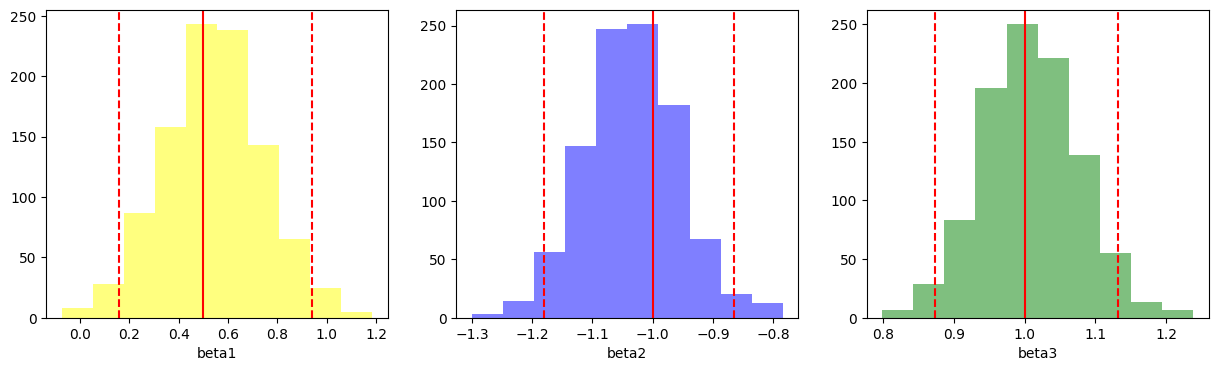

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
color = ["yellow", "blue", "green"]
quantiles = np.percentile(betas, [2.5, 97.5], axis=0)
true_estimates = [0.5, -1, 1]

for i in range(3):
    axes[i].hist(betas[:,i], bins=10, color = color[i], alpha=0.5)
    axes[i].set_xlabel('beta' + str(i+1))
    lower_ci = quantiles[0,i]
    upper_ci = quantiles[1,i]
    axes[i].axvline(lower_ci, linestyle='--', color='red')
    axes[i].axvline(upper_ci, linestyle='--', color='red')
    axes[i].axvline(true_estimates[i], linestyle='solid', color='red')
plt.show()


In [18]:
quantiles = np.percentile(betas, [2.5, 97.5], axis=0)
print('95% Confidence Interval for First Coefficient')
print('Lower CI', quantiles[0,0], 'Upper CI', quantiles[1,0])

print('\n95% Confidence Interval for Second Coefficient')
print('Lower CI', quantiles[0,1], 'Upper CI', quantiles[1,1])

print('\n95% Confidence Interval for Third Coefficient')
print('Lower CI', quantiles[0,2], 'Upper CI', quantiles[1,2])

95% Confidence Interval for First Coefficient
Lower CI 0.1565958002696203 Upper CI 0.941826367893664

95% Confidence Interval for Second Coefficient
Lower CI -1.179688129115017 Upper CI -0.8649625320182802

95% Confidence Interval for Third Coefficient
Lower CI 0.8735284268175015 Upper CI 1.132157674727956


In [19]:
print('Estimated First Coefficient:', estimated_coefficients[0])
print('Estimated Second Coefficient:', estimated_coefficients[1])
print('Estimated Third Coefficient:', estimated_coefficients[2])

Estimated First Coefficient: 0.5435775510486829
Estimated Second Coefficient: -1.034309797966629
Estimated Third Coefficient: 1.0086441645837216


It can be seen that the true value lies between the 95% confidence interval.

## Part 3

In [20]:
X_train = np.column_stack([np.ones(100), X_train, X_train**2, X_train**3])
model = sm.OLS(y_train, X_train).fit()
print(model.summary())
se = model.bse
t_value = stats.t.ppf(0.975, 100 - 4)
linear_confidence_interval = model.params[1] + np.array([-1, 1]) * t_value * se[1]
quadratic_confidence_interval = model.params[2] + np.array([-1, 1]) * t_value * se[2]
cubic_confidence_interval = model.params[3] + np.array([-1, 1]) * t_value * se[3]

print('\n95% Confidence Interval for Linear coefficient:', linear_confidence_interval)
print('\n95% Confidence Interval for Quadratic coefficient:', quadratic_confidence_interval)
print('\n95% Confidence Interval for Cubic coefficient:', cubic_confidence_interval)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     469.5
Date:                Sat, 06 May 2023   Prob (F-statistic):           3.29e-57
Time:                        10:25:27   Log-Likelihood:                -140.13
No. Observations:                 100   AIC:                             288.3
Df Residuals:                      96   BIC:                             298.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5907      0.123      4.786      0.0

When we compare the results of the bootstrap procedure to the results of the statsmodel library, we can see that the confidence intervals for the coefficients are very similar. The coefficient values are also quite close, though there are minor differences in some cases.

Overall, both methods are effective at providing confidence intervals for the cubic model coefficients. The bootstrap procedure, on the other hand, provides a more flexible approach because it does not rely on assumptions about the distribution of errors or sample size. Furthermore, the bootstrap method is applicable to a wide range of statistical models other than linear regression.

The statsmodel library, on the other hand, provides a quick and easy way to perform linear regression and obtain confidence intervals for the coefficients. It also has many extra features, such as hypothesis testing and model diagnostics, that can be useful in some situations.

In conclusion, both the bootstrap procedure and the statsmodel library can be useful tools for calculating confidence intervals for linear regression model coefficients. The choice depends on the specific requirements of the analysis as well as the available resources.

## Problem 3

In [21]:
def permute(X, y):
    y = np.random.permutation(y)
    X = PolynomialFeatures(degree=3).fit_transform(X_train.reshape(-1,1))
    lr = LinearRegression().fit(X, y)
    y_pred = lr.predict(X)
    return r2_score(y, y_pred)


In [22]:
np.random.seed(1)
X_train = np.random.standard_normal(100)
eps = np.random.standard_normal(100)
y_train = 0.5 + 0.5*X_train -  np.power(X_train,2) + np.power(X_train,3) + eps
B = 1000
r2_calculated = permute(X_train, y_train)
r2_boostrap = np.zeros(B)
for i in range(B):
    r2_boostrap[i] = permute(X_train, y_train)
p_value = np.mean(r2_boostrap >= r2_calculated) / B
print(p_value)

0.000722


This is less than the significance level of 0.05 and hence we reject the null hypothesis

## Part 2

In [23]:
from scipy.stats import kendalltau
def tau(x, y):
    y = np.random.permutation(y)
    tau, _ = kendalltau(x, y)
    return tau

In [24]:
B = 1000
tau_calculated, _ = kendalltau(X_train, y_train)
tau_boostrap = np.zeros(B)
for i in range(B):
    tau_boostrap[i] = tau(X_train, y_train)
p_value = np.mean(tau_boostrap >= tau_calculated)
print("we get p-value:", p_value)

we get p-value: 0.0


This is less than the significance level of 0.05 and hence we reject the null hypothesis

## Problem 4

In [25]:
heart_data = pd.read_csv('Heart.csv')
X = heart_data[['Age', 'Sex', 'RestBP', 'Chol']]
heart_data.loc[heart_data['AHD'] =='Yes', 'AHD_Encoded'] = 1
heart_data.loc[heart_data['AHD'] =='No', 'AHD_Encoded'] = 0
heart_data.drop(['AHD'], axis=1, inplace=True)
heart_data = pd.get_dummies(heart_data, columns=['ChestPain', 'Thal'])
heart_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
y = heart_data['AHD_Encoded']
heart_data.fillna(0, inplace=True)
model = sm.Logit(y, sm.add_constant(X)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.602425
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            AHD_Encoded   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.1266
Time:                        10:25:28   Log-Likelihood:                -182.53
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 8.890e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3895      1.381     -5.352      0.000     -10.095      -4.683
Age            0.0558      0.

In [26]:
model.params

const    -7.389471
Age       0.055793
Sex       1.677529
RestBP    0.014116
Chol      0.004573
dtype: float64

In [27]:
logistic_regression_errors = model.bse
model.bse

const     1.380628
Age       0.015539
Sex       0.308226
RestBP    0.007593
Chol      0.002535
dtype: float64

In [28]:
def cv_fn(data, k):
    X = data.drop('AHD_Encoded', axis=1)
    y = data['AHD_Encoded']
    model = LogisticRegression(max_iter = 1000)
    score = cross_val_score(model, X, y, cv=k)
    return (1 - score.mean())

## Part 3

In [29]:
misclassification_rate = cv_fn(heart_data, k = 5)
print(misclassification_rate)

0.17180327868852463


## Part 4

In [30]:
def boot_fn(data, index):
    X = data[['Age', 'Sex', 'RestBP', 'Chol']]
    y = data['AHD_Encoded']
    X_resampled, y_resampled = resample(X, y)
    logreg = LogisticRegression(solver='liblinear')
    logreg.fit(X_resampled, y_resampled)
    return logreg.coef_.ravel()

In [31]:
B = 500
coefs = pd.DataFrame(columns=['Age', 'Sex', 'RestBP', 'Chol'])
for i in range(B):
    coefs.loc[i] = boot_fn(heart_data, i)

final_coefs = np.mean(coefs, axis = 0)
print('Mean of Final Coefficients')
print(final_coefs)

print('\nStandard Errors')
standard_error = np.std(coefs, axis = 0)
print(standard_error)

Mean of Final Coefficients
Age       0.033438
Sex       1.156867
RestBP   -0.002030
Chol      0.000982
dtype: float64

Standard Errors
Age       0.012752
Sex       0.233128
RestBP    0.005911
Chol      0.002270
dtype: float64


In [32]:
print('Standard error from previous part')
print(logistic_regression_errors)

Standard error from previous part
const     1.380628
Age       0.015539
Sex       0.308226
RestBP    0.007593
Chol      0.002535
dtype: float64
